# eFG% between 2014-2015 and 2018-2019 seasons

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Load file
players_data_loading = Path("Player Stats Per Game By Season.csv")
champions_data_loading = Path("Revised NBA Champions.csv")
nicknames_data_loading = Path("Revised Nicknames.csv")


# Read file
players_data = pd.read_csv(players_data_loading)
champions_data = pd.read_csv(champions_data_loading)
nicknames_data = pd.read_csv(nicknames_data_loading)


# Show file
players_data.head()

,Unnamed: 0,Player Name,Team(abv.),Games Played,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,Field Goal Percentage,3-Point Field Goals Per Game,3-Point Field Goal Attempts Per Game,...,Offensive Rebounds Per Game,Defensive Rebounds Per Game,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Season Year
0,0,Tariq Abdul-Wahad,TOT,61,25.9,4.5,10.6,0.424,0.0,0.4,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,1999-2000
1,1,Tariq Abdul-Wahad,ORL,46,26.2,4.8,11.2,0.433,0.0,0.5,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,1999-2000
2,2,Tariq Abdul-Wahad,DEN,15,24.9,3.4,8.7,0.389,0.1,0.1,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,1999-2000
3,3,Shareef Abdur-Rahim,VAN,82,39.3,7.2,15.6,0.465,0.4,1.2,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,1999-2000
4,4,Cory Alexander,DEN,29,11.3,1.0,3.4,0.286,0.3,1.2,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,1999-2000


In [60]:
# Drop the unnamed column and the league column.

players_data = players_data.drop(columns= ['Unnamed: 0'])



In [61]:
# Add champion data to player dataset.
players_with_champs = pd.merge(
    players_data, champions_data,
    left_on='Season Year', right_on='Year',
    left_index=False, right_index=False)

players_with_champs = players_with_champs.rename(
    columns={"Abbreviation": "Champs(abv.)"})

players_with_champs = players_with_champs.drop(columns='Year') 
players_with_champs.head()

,Player Name,Team(abv.),Games Played,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,Field Goal Percentage,3-Point Field Goals Per Game,3-Point Field Goal Attempts Per Game,3-Point Field Goal Percentage,...,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Season Year,Champion,Champs(abv.)
0,Tariq Abdul-Wahad,TOT,61,25.9,4.5,10.6,0.424,0.0,0.4,0.130,...,4.8,1.6,1.0,0.5,1.7,2.4,11.4,1999-2000,Los Angeles Lakers,LAL
1,Tariq Abdul-Wahad,ORL,46,26.2,4.8,11.2,0.433,0.0,0.5,0.095,...,5.2,1.6,1.2,0.3,1.9,2.5,12.2,1999-2000,Los Angeles Lakers,LAL
2,Tariq Abdul-Wahad,DEN,15,24.9,3.4,8.7,0.389,0.1,0.1,0.500,...,3.5,1.7,0.4,0.8,1.3,2.1,8.9,1999-2000,Los Angeles Lakers,LAL
3,Shareef Abdur-Rahim,VAN,82,39.3,7.2,15.6,0.465,0.4,1.2,0.302,...,10.1,3.3,1.1,1.1,3.0,3.0,20.3,1999-2000,Los Angeles Lakers,LAL
4,Cory Alexander,DEN,29,11.3,1.0,3.4,0.286,0.3,1.2,0.257,...,1.4,2.0,0.8,0.1,1.0,1.3,2.8,1999-2000,Los Angeles Lakers,LAL


In [62]:
# Find the effective field goal percentage of each team between 
# the 2014-2015 season and the 2018-2019 season.
season_2014_2015 = players_with_champs.loc[
    players_with_champs['Season Year'] == '2014-2015']

efg_percent_2014_2015 = season_2014_2015.groupby(
    'Team(abv.)')['Effective Field Goal Percentage'].mean()

season_2015_2016 = players_with_champs.loc[
    players_with_champs['Season Year'] == '2015-2016']

efg_percent_2015_2016 = season_2015_2016.groupby(
    'Team(abv.)')['Effective Field Goal Percentage'].mean()
    
season_2016_2017 = players_with_champs.loc[
    players_with_champs['Season Year'] == '2016-2017']

efg_percent_2016_2017 = season_2016_2017.groupby(
    'Team(abv.)')['Effective Field Goal Percentage'].mean()

season_2017_2018 = players_with_champs.loc[
    players_with_champs['Season Year'] == '2017-2018']

efg_percent_2017_2018 = season_2017_2018.groupby(
    'Team(abv.)')['Effective Field Goal Percentage'].mean()

season_2018_2019 = players_with_champs.loc[
    players_with_champs['Season Year'] == '2018-2019']

efg_percent_2018_2019 = season_2018_2019.groupby(
    'Team(abv.)')['Effective Field Goal Percentage'].mean()        

efg_2015_2019 = pd.DataFrame({
    "2014-2015": efg_percent_2014_2015,
    "2015-2016": efg_percent_2015_2016,
    "2016-2017": efg_percent_2016_2017,
    "2017-2018": efg_percent_2017_2018,
    "2018-2019": efg_percent_2018_2019})

efg_2015_2019


,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
Team(abv.),,,,,
ATL,0.504500,0.492294,0.474350,0.518045,0.542909
BOS,0.490045,0.479125,0.539667,0.460150,0.546353
BRK,0.448579,0.483235,0.495762,0.469364,0.523684
CHI,0.464571,0.480563,0.456944,0.450762,0.477636
CHO,0.467706,0.499353,0.469579,0.502059,0.474882
CLE,0.466650,0.504222,0.495524,0.515045,0.452741
DAL,0.498421,0.517250,0.457375,0.455783,0.471619
DEN,0.483100,0.459368,0.547684,0.502222,0.503611
DET,0.458100,0.496941,0.461533,0.493636,0.436950


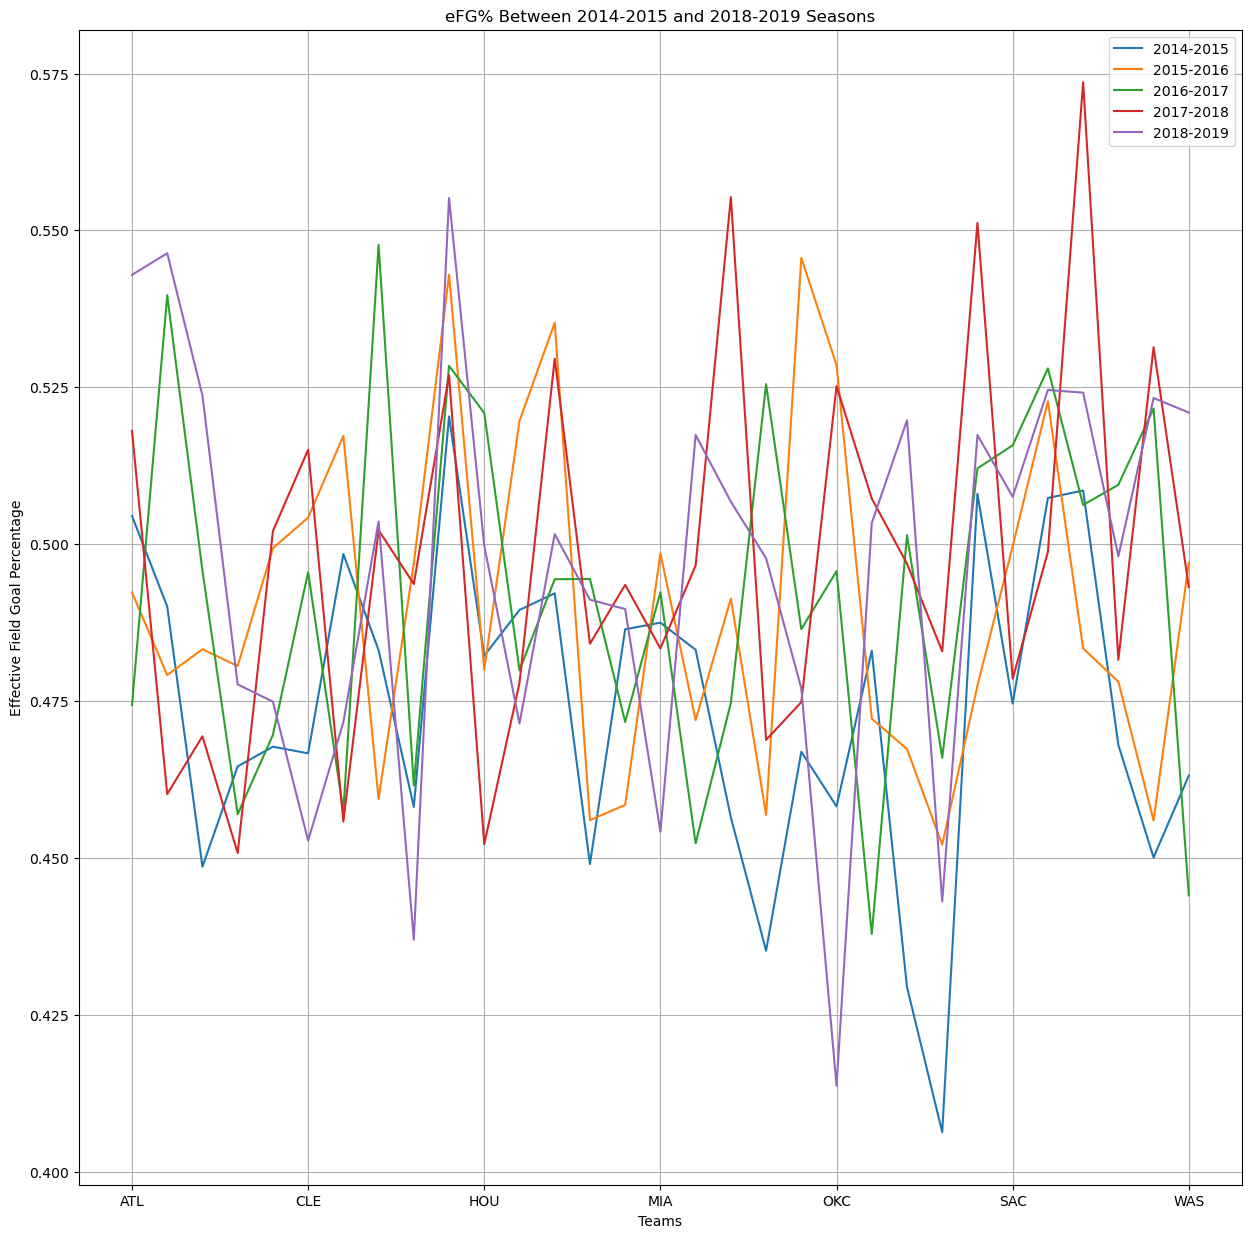

In [63]:
# Plot findings in a line graph and save.
efg_2015_2019.plot(
    kind='line',
    ylabel='Effective Field Goal Percentage',
    xlabel='Teams',
    title='eFG% Between 2014-2015 and 2018-2019 Seasons',
    figsize=(15,15),
    grid=True
    )

plt.savefig("Saved Images/eFG%.png", bbox_inches='tight')